<a href="https://colab.research.google.com/github/antoniojgraterol/data_science/blob/main/Data_Science_Final_Project_Graterol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

**Summary**

This analysis aims to thoroughly explore a job postings dataset to identify patterns and characteristics associated with fraudulent or deceptive job ads. By examining a variety of variables including location, salary, company profile, and job requirements, we seek to understand which elements can predict the authenticity of a job posting.

Classification algorithms were implemented to predict the likelihood of a job posting being fraudulent. These machine learning algorithms were trained using a labeled dataset containing both fraudulent and non-fraudulent job postings. The goal is to leverage the rich information present in the dataset to build a robust and accurate model.

Deploying these algorithms will not only facilitate the efficient identification of potentially deceptive job postings but also create a dynamic system capable of adapting to changing trends in the job market. This proactive approach benefits job seekers by providing an additional layer of security and offers job platforms more effective tools to safeguard the integrity of their services.

In summary, this analysis aims not only to understand the factors surrounding fraudulent job postings but also to implement practical and predictive solutions for improving early detection and prevention of dishonest hiring practices.

**Motivation**

In today's fast-paced job market, identifying fraudulent or deceptive job postings has become more critical than ever. The proliferation of online platforms has made it easier to disseminate job ads, but unfortunately, not all of them are transparent or legitimate. Early detection of fraudulent postings protects candidates from potential scams and contributes to the overall integrity of the job market.

This analysis seeks to shed light on the characteristics that might be associated with fraudulent or deceptive job postings. By understanding the underlying patterns and key variables, we can not only improve candidates' ability to make informed decisions but also help job platforms refine their filtering and security systems.

**Audience**

This analysis is intended for a wide audience, including human resources and recruitment professionals, individual job seekers, academic researchers, and those committed to ethics in the workplace and combating fraud.

* Workplace Ethics Advocates: It will provide a critical perspective on the ethical challenges in the job market and the importance of implementing measures to safeguard the integrity of the hiring process.
* Human Resources and Recruitment Professionals: They will gain valuable insights to enhance their filtering strategies and ensure the authenticity of the job opportunities they offer.
* Individual Job Seekers: It will provide tools to assess the legitimacy of job postings, empowering them to make more informed career decisions.
* Academic Researchers: They can use this analysis as a foundation for further research on job market dynamics and the evolution of fraudulent practices in the workplace.

Ultimately, this analysis aspires to be a valuable contribution to fostering a more transparent and trustworthy job market for all parties involved.

#The Problem


To delve into how the data operates and understand its behavior, it is essential to answer a set of key questions. These questions include:

* What is the geographical distribution of job postings in the dataset?
* What are the most common departments for which job requirements are posted?
* How are salary ranges distributed across job postings?
* What is the proportion of on-site versus online job postings?
* What percentage of ads include the company's logo?
* Are there notable patterns in the experience level required by industry?
* What are the most frequent job functions in fraudulent or deceptive job postings?

Ultimately, the problem posed is to **determine which algorithm can predict with good accuracy whether a job posting is fraudulent or deceptive**.

#Exploratory Data Analysis (EDA)


##Loading libraries

In [ ]:
#Data processing libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

#Warning handling library
import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [ ]:
df_scam=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jobs_scam_dataset.zip',compression='zip')
df_scam.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


##Data dictionary

Variable | Descripción
-------------------|------------------
Title | The title of the job ad
Location | Geographic location of the job offer
Department | Requiring department (e.g., Sales)
Salary range | Salary range (e.g., between $50,000 and $60,000)
Company profile | A brief description of the requiring company
Description | Detailed description of the job ad
Requirements | Requirements to be met by the applicants
Benefits | List of offered benefits
Telecommuting | True if the position is online or remote
Company logo | True if the ad contains a company logo
Questions | True if the ad contains screening questions
Fraudulent | True if the ad is fraudulent or deceptive
In balanced | True if the ad is part of a dataset sample with an equal number of fraudulent and non-fraudulent ads
Employment type | Type of employment (full-time, part-time, contract, etc.)
Required experience | Level of required experience (Executive, entry-level, intern, etc.)
Required education | Level of required education (PhD, Master's, Bachelor's, etc.)
Industry | Industry of the requiring company (Automotive, IT, Healthcare, Real Estate, etc.)
Function | Function for which personnel is required (Consulting, Engineering, Research, Sales, etc.)

##Dataset description



In [ ]:
df_scam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:
print('The dataset consists of '+str(df_scam.shape[0])+' records and '+str(df_scam.shape[1])+' columns (fields)')

The dataset consists of 17880 records and 18 columns (fields)


The dataset includes a field that identifies a sample of 900 records, with an equal number of fraudulent and non-fraudulent ads (450 fraudulent and 450 non-fraudulent) to avoid the "reductive" effect that occurs when comparing the number of fraudulent records against the total number of records (4.84%).

For this reason, the dataframe will be segmented following this premise.

In [ ]:
print('The total amount of fraudulent records is '+str(df_scam[df_scam['fraudulent'] == 't'].shape[0]))
print('The corresponding ratio out of the whole is '+str(round(df_scam[df_scam['fraudulent'] == 't'].shape[0]/df_scam.shape[0]*100,2))+'%')

The total amount of fraudulent records is 866
The corresponding ratio out of the whole is 4.84%


##Balanced dataset

In [ ]:
df_scam=df_scam[df_scam['in_balanced_dataset'] == 't']
print('The modified dataset consists of '+str(df_scam.shape[0])+' records and '+str(df_scam.shape[1])+' fields')

The modified dataset consists of 900 records and 18 fields


In [ ]:
null_ratio = (df_scam.isnull().sum() / len(df_scam)) * 100

#Creates a series of every field's null ratio
null_series = pd.Series(null_ratio, name='null_ratio').sort_values(ascending=False)

#Print null_series
print(null_series)

salary_range           81.333333
department             68.555556
required_education     53.333333
company_profile        52.777778
required_experience    44.444444
function               42.000000
benefits               38.666667
industry               35.444444
employment_type        29.111111
requirements           19.333333
location                2.555556
title                   0.000000
fraudulent              0.000000
has_company_logo        0.000000
has_questions           0.000000
telecommuting           0.000000
description             0.000000
in_balanced_dataset     0.000000
Name: null_ratio, dtype: float64


<Axes: >

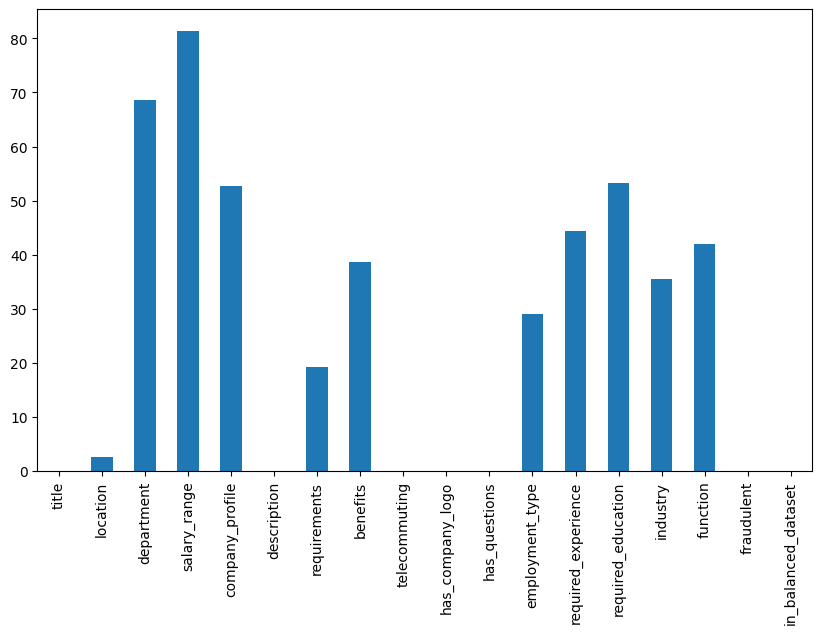

In [ ]:
#Plots a bar chart of every field's null ratio
plt.figure(figsize=(10,6))
null_ratio.plot(kind='bar')

During this analysis, we can observe a significant amount of missing values for salary_range, department, required_education, benefits, required_experience, function, and industry, with percentages ranging from 35% to 81%. However, for the purposes of this study, these omissions are relevant.

When reading a job offer with a vague description and few details, it can be percieved as suspicious, as these should generally highlight their benefits to attract candidates who best fit the requirements.

Therefore, all empty items will be replaced with the label 'Unspecified' since this is already used within the dataset for this purpose.

In [ ]:
#Replaces empty with 'Unspecified'
df_scam.fillna("Unspecified", inplace=True)

#Recalculates null ratio as verification
null_ratio = (df_scam.isnull().sum() / len(df_scam)) * 100
null_series = pd.Series(null_ratio, name='null_ratio').sort_values(ascending=False)
print(null_series)

title                  0.0
location               0.0
fraudulent             0.0
function               0.0
industry               0.0
required_education     0.0
required_experience    0.0
employment_type        0.0
has_questions          0.0
has_company_logo       0.0
telecommuting          0.0
benefits               0.0
requirements           0.0
description            0.0
company_profile        0.0
salary_range           0.0
department             0.0
in_balanced_dataset    0.0
Name: null_ratio, dtype: float64


##Variable mapping
A function is define to show the information of each category composing the dataset

In [ ]:
def value_counts_report(df):
    reports = {}  #this object will store field's value_counts reports
    for column in df.columns:
        report = df[column].value_counts()
        reports[column] = report
    return reports

#Loads reports into results
results = value_counts_report(df_scam)

#Loops over result's reports for display purposes
for column, report in results.items():
    print(f"Report for '{column}' field:")
    print(report)
    print("\n")

Report for 'title' field:
title
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    20
Home Based Payroll Typist/Data Entry Clerks Positions Available         20
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
                                                                        ..
Agent inbound business                                                   1
Global Category Manager - IT/MRO/HR                                      1
Part time shop assistant                                                 1
Engineering Technician                                                   1
Furniture mover                                                          1
Name: count, Length: 700, dtype: int64


Report for 'location' field:
location
US, NY, New York         34
AU, NSW, Sydney          29
US, ,   

Following the previous analysis, it is evident that there is a high variety of values for several fields in the dataset. It is advisable to group similar values to reduce variability and thus the level of detail.

##Category grouping

The records for categories having 15 or less occurrences will be mapped as 'Other', except for some specific categories considered convenient to have a complete spectrum.

In [ ]:
#Gets the country code (firts two letters of the location value) from the location for those available
df_scam['location'] = df_scam['location'].apply(lambda x: str(x)[:2] if x != 'Unspecified' and not pd.isnull(x) else x)

#Sets a dictionary to unify the categories for education field
education_mapping = {
    'High School or equivalent': 'High School',
    'Some College Coursework Completed': 'High School',
    'Vocational - HS Diploma': 'High School',
    'Certification': 'Professional/Vocational',
    'Professional': 'Professional/Vocational',
    'Vocational': 'Professional/Vocational',
    'Vocational - Degree': 'Professional/Vocational',
    'Some High School Coursework': 'Under High School'
}
df_scam['required_education'] = df_scam['required_education'].replace(education_mapping)

#Sets a dictionary to unify the categories for function field
function_mapping = {
    'Information Technology': 'TI',
    'Marketing': 'Marketing/Advertising',
    'Advertising': 'Marketing/Advertising',
    'Data Analyst': 'Business Analyst',
    'Financial Analyst': 'Business Analyst',
    'Production': 'Production/Manufacturing',
    'Manufacturing': 'Production/Manufacturing',
    'Research': 'Research/Science',
    'Science': 'Research/Science',
    'Business Development': 'Management',
    'Project Management': 'Management',
    'Product Management': 'Management',
    'Strategy/Planning': 'Management',
    'Administrative': 'Administrative services',
    'Accounting/Auditing': 'Administrative services',
    'Human Resources': 'Administrative services',
    'Finance': 'Administrative services',
    'Public Relations': 'Administrative services',
    'General Business': 'Administrative services',
    'Health Care Provider':'Other',
    'Business Analyst':'Other',
    'Design':'Other',
    'Art/Creative':'Other',
    'Consulting':'Other',
    'Research/Science':'Other',
    'Writing/Editing':'Other',
    'Supply Chain':'Other',
    'Quality Assurance':'Other',
    'Education':'Other',
    'Production/Manufacturing':'Other',
    'Legal':'Other',
    'Distribution':'Other'
}
df_scam['function'] = df_scam['function'].replace(function_mapping)

#Sets a dictionary to unify the categories for employment field
employment_mapping = {
  'Other': 'Unspecified'
}
df_scam['employment_type'] = df_scam['employment_type'].replace(employment_mapping)

#Sets a dictionary to unify the categories for industry field
industry_mapping = {
  'Financial Services':'Banking and Finance',
  'Banking':'Banking and Finance',
  'Investment Banking':'Banking and Finance',
  'Computer Hardware':'Other',
  'Semiconductors':'Other',
  'Restaurants':'Other',
  'Food Production':'Other',
  'Hospital & Health Care':'Health Care',
  'Health, Wellness and Fitness':'Health Care',
  'Medical Practice':'Health Care',
  'Mental Health Care':'Health Care',
  'Medical Devices':'Health Care',
  'Staffing and Recruiting':'Other',
  'Computer Software':'Information Technology and Services',
  'Internet':'Information Technology and Services',
  'Telecommunications':'Information Technology and Services',
  'Computer Games':'Information Technology and Services',
  'Computer & Network Security':'Information Technology and Services',
  'Computer Networking':'Information Technology and Services',
  'Law Practice':'Legal Services',
  'Online Media':'Media and Entertainment',
  'Entertainment':'Media and Entertainment',
  'Broadcast Media':'Media and Entertainment',
  'Events Services':'Media and Entertainment',
  'Media Production':'Media and Entertainment',
  'Music':'Media and Entertainment',
  'Printing':'Other',
  'Security and Investigations':'Other',
  'Research':'Other',
  'Venture Capital & Private Equity':'Other',
  'Information Services':'Other',
  'Aviation & Aerospace':'Other',
  'Farming':'Other',
  'Sports':'Other',
  'Chemicals':'Other',
  'Government Administration':'Other',
  'Writing and Editing':'Other',
  'Outsourcing/Offshoring':'Other',
  'Business Supplies and Equipment':'Other',
  'Fund-Raising':'Other',
  'Professional Training & Coaching':'Other',
  'Wholesale':'Other',
  'Government Relations':'Other',
  'Machinery':'Other',
  'Higher Education':'Other',
  'Law Enforcement':'Other',
  'Translation and Localization':'Other',
  'Architecture & Planning':'Other',
  'Civil Engineering':'Other',
  'Defense & Space':'Other',
  'Renewables & Environment':'Other',
  'Program Development':'Other',
  'Individual & Family Services':'Other',
  'International Trade and Development':'Other',
  'Veterinary':'Other',
  'Executive Office':'Other',
  'Photography':'Other',
  'Industrial Automation':'Other',
  'Public Safety':'Other',
  'Investment Management':'Other',
  'Motion Pictures and Film':'Other',
  'Primary/Secondary Education':'Other',
  'Religious Institutions':'Other',
  'Import and Export':'Other',
  'Packaging and Containers':'Other',
  'Package/Freight Delivery':'Other',
  'Capital Markets':'Other',
  'Animation':'Other',
  'Luxury Goods & Jewelry':'Other',
  'Fishery':'Other',
  'Commercial Real Estate':'Other',
  'Philanthropy':'Other',
  'Wireless':'Other',
  'Public Policy':'Other',
  'Performing Arts':'Other',
  'Plastics':'Other',
  'Mining & Metals':'Other',
  'Furniture':'Other',
  'Maritime':'Other',
  'Libraries':'Other',
  'Nanotechnology':'Other',
  'Textiles':'Other',
  'Military':'Other',
  'Alternative Dispute Resolution':'Other',
  'Shipbuilding':'Other',
  'Sporting Goods':'Other',
  'Museums and Institutions':'Other',
  'Wine and Spirits':'Other',
  'Ranching':'Other',
  'Human Resources':'Other',
  'Oil & Energy':'Other',
  'Retail':'Other',
  'Hospitality':'Other',
  'Electrical/Electronic Manufacturing':'Other',
  'Automotive':'Other',
  'Construction':'Other',
  'Apparel & Fashion':'Other',
  'E-Learning':'Other',
  'Logistics and Supply Chain':'Other',
  'Warehousing':'Other',
  'Environmental Services':'Other',
  'Facilities Services':'Other',
  'Management Consulting':'Other',
  'Airlines/Aviation':'Other',
  'Civic & Social Organization':'Other',
  'Education Management':'Other',
  'Design':'Other',
  'Consumer Electronics':'Other',
  'Public Relations and Communications':'Other',
  'Cosmetics':'Other',
  'Nonprofit Organization Management':'Other',
  'Legal Services':'Other',
  'Food & Beverages':'Other',
  'Building Materials':'Other',
  'Gambling & Casinos':'Other',
  'Insurance':'Other',
  'Utilities':'Other',
  'Mechanical or Industrial Engineering':'Other',
  'Market Research':'Other',
  'Publishing':'Other',
  'Consumer Goods':'Other',
  'Pharmaceuticals':'Other',
  'Transportation/Trucking/Railroad':'Other'
}
df_scam['industry'] = df_scam['industry'].replace(industry_mapping)

#Sets a dictionary to unify the categories for location field
location_mapping = {
  'FI':'Other',
  'PK':'Other',
  'LT':'Other',
  'MY':'Other',
  'QA':'Other',
  'JP':'Other',
  'RU':'Other',
  'MX':'Other',
  'PT':'Other',
  'BG':'Other',
  'TR':'Other',
  'CN':'Other',
  'CH':'Other',
  'SA':'Other',
  'MU':'Other',
  'HU':'Other',
  'AT':'Other',
  'ID':'Other',
  'MT':'Other',
  'UA':'Other',
  'CY':'Other',
  'IQ':'Other',
  'KR':'Other',
  'TH':'Other',
  'NG':'Other',
  'AR':'Other',
  'LU':'Other',
  'BH':'Other',
  'BY':'Other',
  'PA':'Other',
  'NO':'Other',
  'RS':'Other',
  'KE':'Other',
  'CZ':'Other',
  'LV':'Other',
  'VN':'Other',
  'NI':'Other',
  'TT':'Other',
  'TW':'Other',
  'VI':'Other',
  'KW':'Other',
  'TN':'Other',
  'AM':'Other',
  'IS':'Other',
  'LK':'Other',
  'SK':'Other',
  'CL':'Other',
  'ZM':'Other',
  'BD':'Other',
  'HR':'Other',
  'JM':'Other',
  'KZ':'Other',
  'SV':'Other',
  'CM':'Other',
  'PE':'Other',
  'AL':'Other',
  'GH':'Other',
  'MA':'Other',
  'SI':'Other',
  'CO':'Other',
  'SD':'Other',
  'UG':'Other',
  'KH':'Other',
  'IN':'Other',
  'DE':'Other',
  'NZ':'Other',
  'IE':'Other',
  'PL':'Other',
  'BR':'Other',
  'FR':'Other',
  'BE':'Other',
  'NL':'Other',
  'SE':'Other',
  'SG':'Other',
  'EE':'Other',
  'ZA':'Other',
  'IL':'Other',
  'PH':'Other',
  'AE':'Other',
  'EG':'Other',
  'IT':'Other',
  'DK':'Other',
  'HK':'Other',
  'ES':'Other'
}
df_scam['location'] = df_scam['location'].replace(location_mapping)

In [ ]:
#Repeats the process to display the changes done
results = value_counts_report(df_scam)
for column, report in results.items():
  if column=='location' or column=='required_education' or column=='function' or column=='employment_type' or column=='industry' or column=='location':
    print(f"Report for '{column}' field:")
    print(report)
    print("\n")

Report for 'location' field:
location
US             589
GB             103
Other           99
AU              39
GR              30
Unspecified     23
CA              17
Name: count, dtype: int64


Report for 'employment_type' field:
employment_type
Full-time      497
Unspecified    280
Part-time       79
Contract        37
Temporary        7
Name: count, dtype: int64


Report for 'required_education' field:
required_education
Unspecified                572
Bachelor's Degree          144
High School                133
Under High School           19
Master's Degree             14
Professional/Vocational      9
Associate Degree             8
Doctorate                    1
Name: count, dtype: int64


Report for 'industry' field:
industry
Unspecified                            319
Other                                  164
Information Technology and Services    147
Health Care                             63
Banking and Finance                     47
Marketing and Advertising              

There are 4 highly valuable fields ('company_profile', 'description', 'requirements', and 'benefits') for the study, but since they consist of free text, natural language processing algorithms must be applied to analyze them correctly and generate patterns based on their content.

As a provisional measure, it is proposed to add 4 fields indicating whether each of these fields contains a value or not, regardless of the quality of the content.

In [ ]:
#Adds columns for the fields mentioned above, having 't' (true) in case they have text and 'f' if not.
df_scam['has_company_profile'] = df_scam['company_profile'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_description'] = df_scam['description'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_requirements'] = df_scam['requirements'].apply(lambda x: 't' if x != 'Unspecified' else 'f')
df_scam['has_benefits'] = df_scam['benefits'].apply(lambda x: 't' if x != 'Unspecified' else 'f')

##Visualizations

### Data Distribution

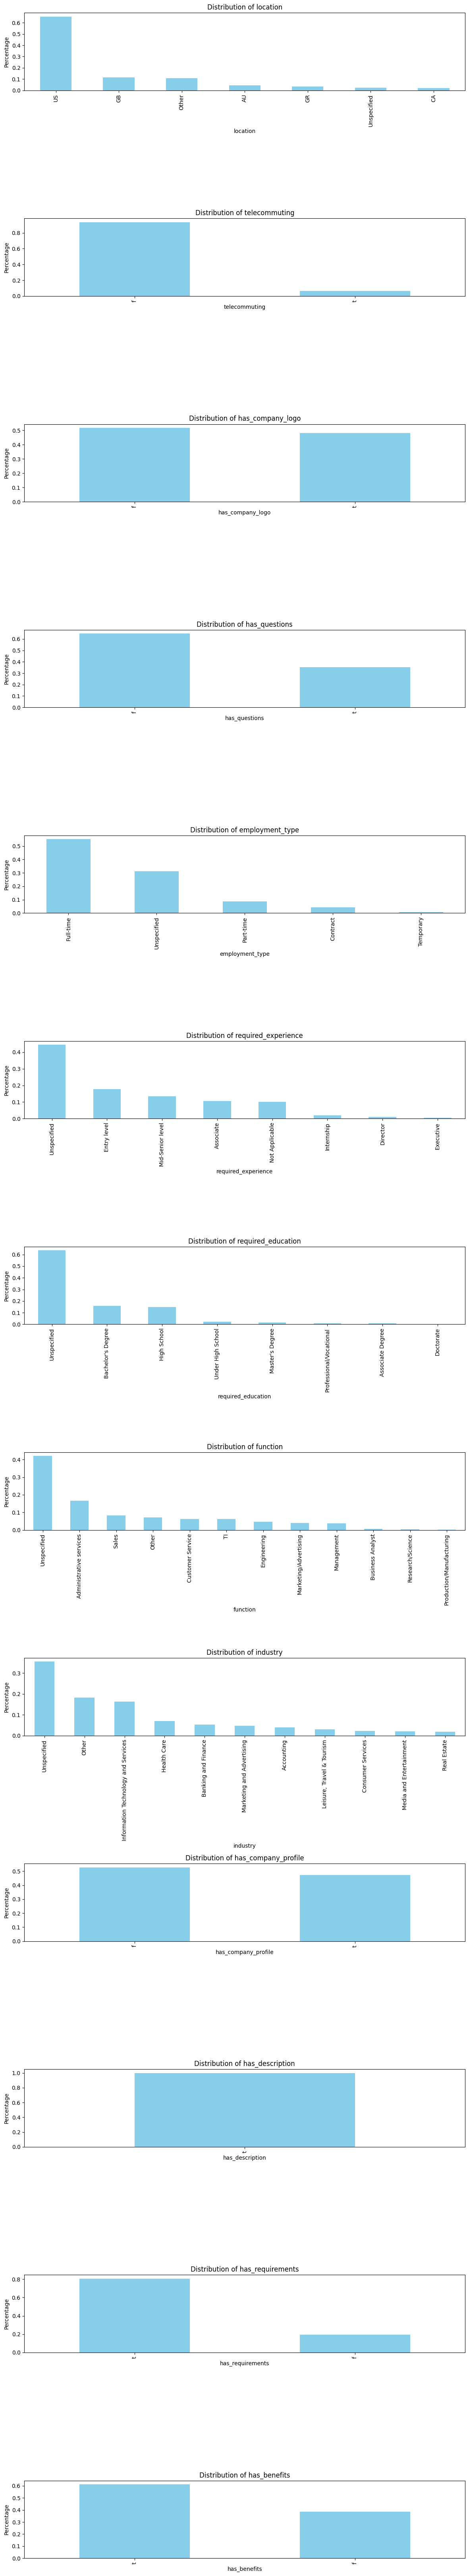

In [ ]:
#Set an array with the columns that will be analyzed
columns_to_plot = ['location', 'telecommuting', 'has_company_logo', 'has_questions','employment_type','required_experience','required_education', 'function', 'industry','has_company_profile','has_description', 'has_requirements','has_benefits']

#Generates a matrix of bar charts
#Sets the amount of charts
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 5 * len(columns_to_plot)))

#Generates each bar chart
for i, column in enumerate(columns_to_plot):
    df_scam[column].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')

#Adjusts the charts
plt.tight_layout()
plt.show()

###Data Distribution regarding 'fraudulent' records
Using seaborn, bar charts are created to appreciate the relationship between the categories of the studied variables and the 'fraudulent' variable, in most cases, for better understanding, a second chart with the same data is displayed using the logarithmic scale helping small values to be visible.

####'location' chart

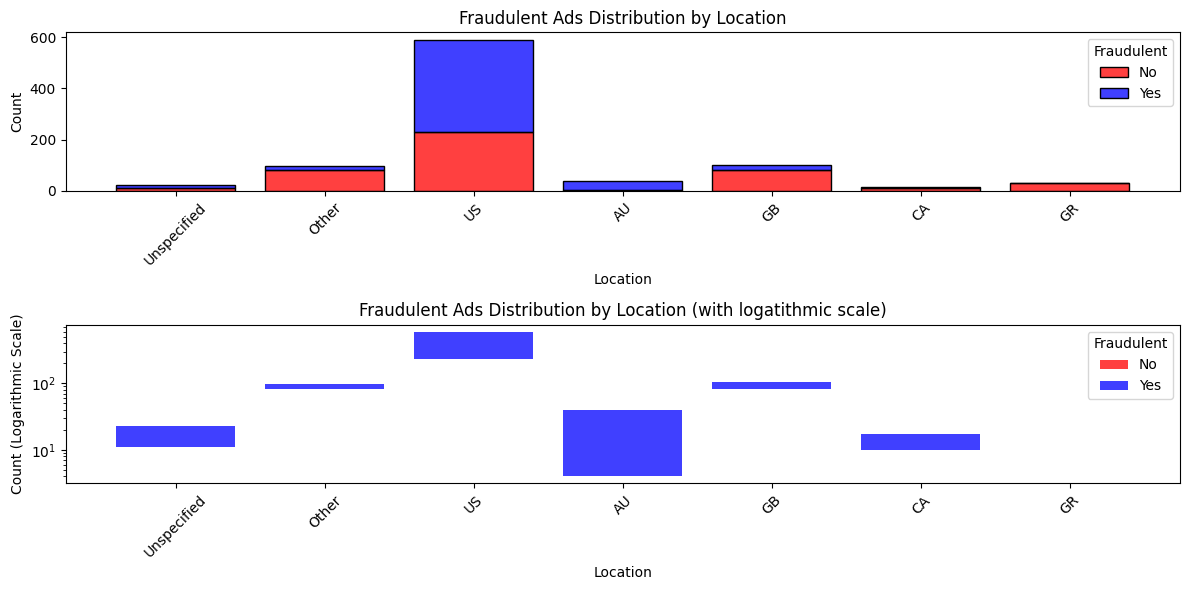

In [ ]:
#'location' chart
#Color palette
colors = {'t': 'blue', 'f': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='location', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])

#Adjusts chart desing
axes[0].set_title('Fraudulent Ads Distribution by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='location', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])

#Ajustar el diseño del segundo gráfico
axes[1].set_title('Fraudulent Ads Distribution by Location (with logatithmic scale)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'telecommuting' chart

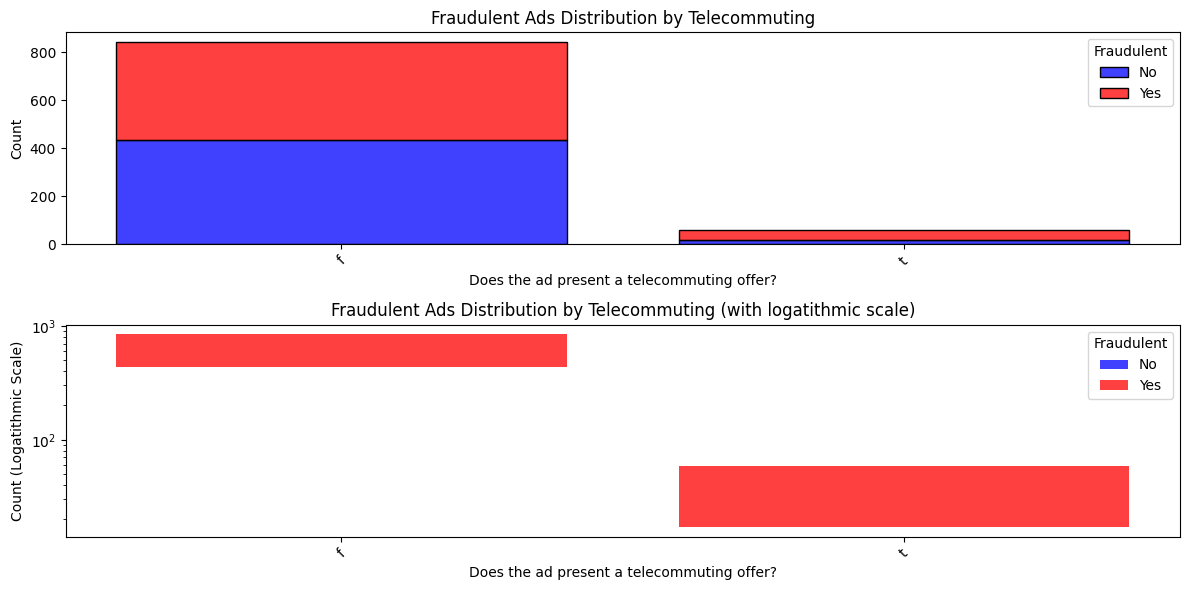

In [ ]:
#'telecommuting' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='telecommuting', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by Telecommuting')
axes[0].set_xlabel('Does the ad present a telecommuting offer?')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='telecommuting', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by Telecommuting (with logatithmic scale)')
axes[1].set_xlabel('Does the ad present a telecommuting offer?')
axes[1].set_ylabel('Count (Logatithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'has_company_logo' chart

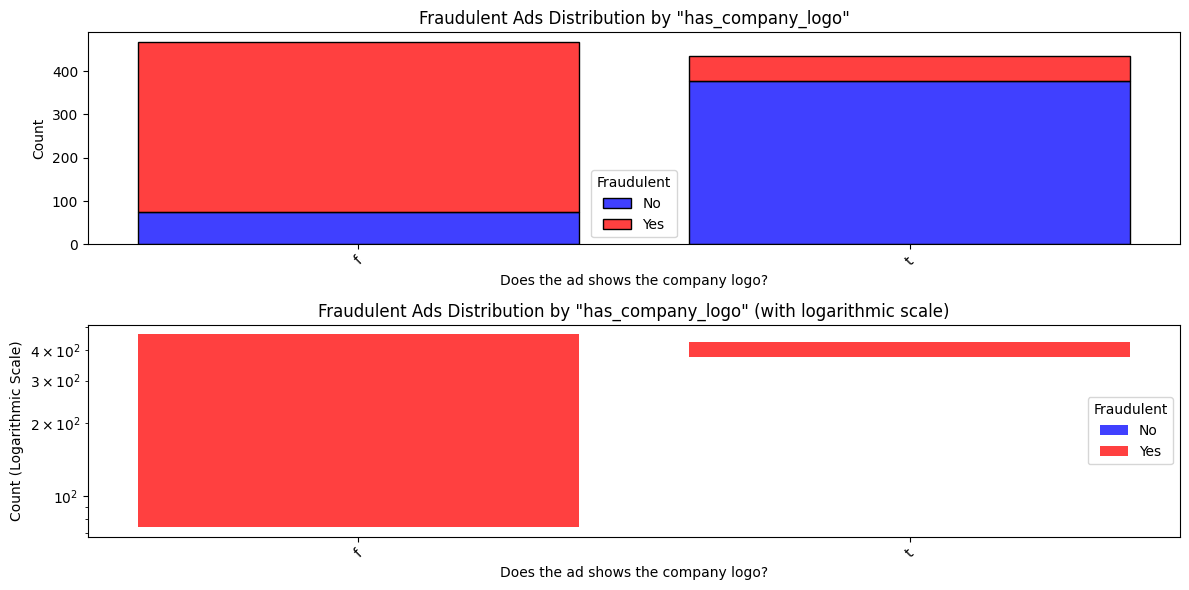

In [ ]:
#'has_company_logo' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_company_logo', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "has_company_logo"')
axes[0].set_xlabel('Does the ad shows the company logo?')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_company_logo', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "has_company_logo" (with logarithmic scale)')
axes[1].set_xlabel('Does the ad shows the company logo?')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'has_questions' chart

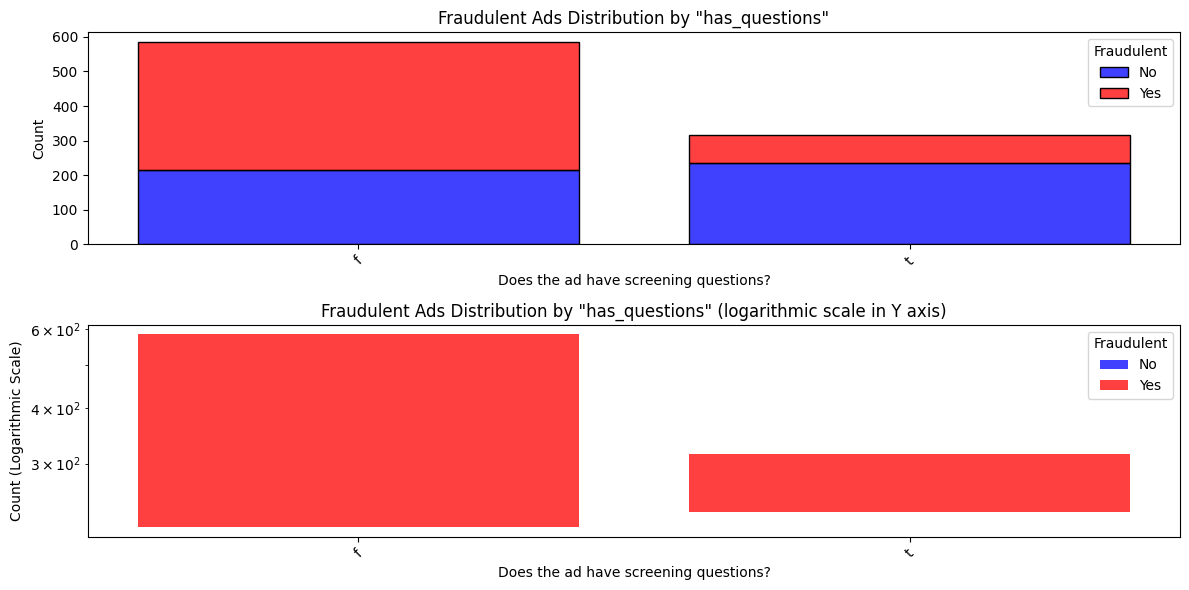

In [ ]:
#'has_questions' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_questions', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])

#First chart: without logarithmic scale in Y axis
axes[0].set_title('Fraudulent Ads Distribution by "has_questions"')
axes[0].set_xlabel('Does the ad have screening questions?')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_questions', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "has_questions" (logarithmic scale in Y axis)')
axes[1].set_xlabel('Does the ad have screening questions?')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'employment_type' chart

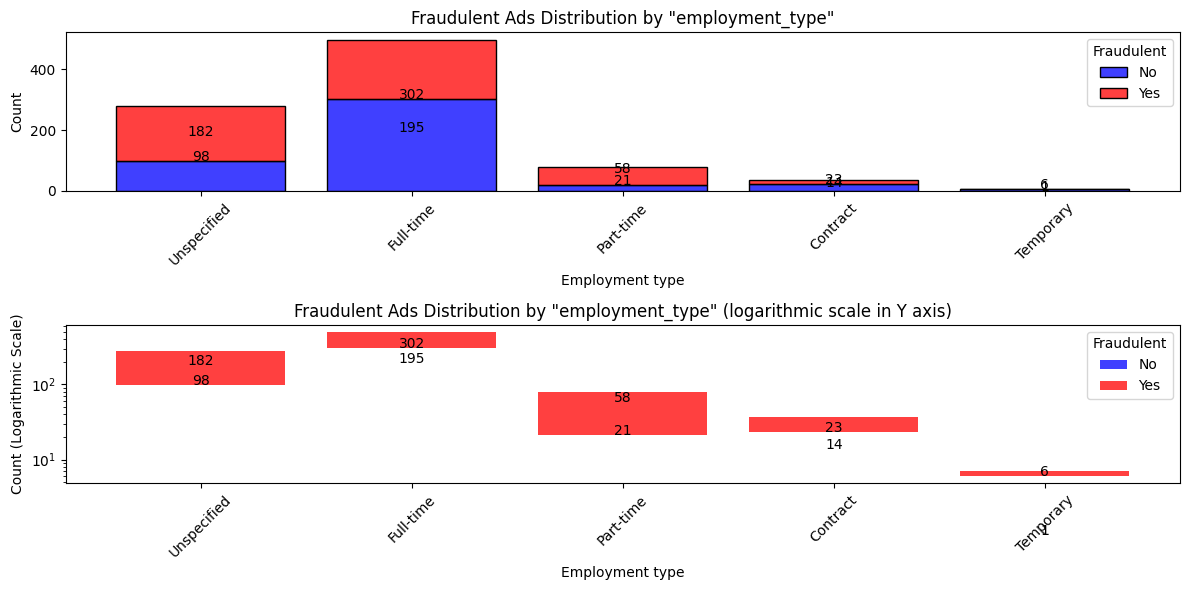

In [ ]:
#'employment_type' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='employment_type', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "employment_type"')
axes[0].set_xlabel('Employment type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='employment_type', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "employment_type" (logarithmic scale in Y axis)')
axes[1].set_xlabel('Employment type')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'required_experience' chart

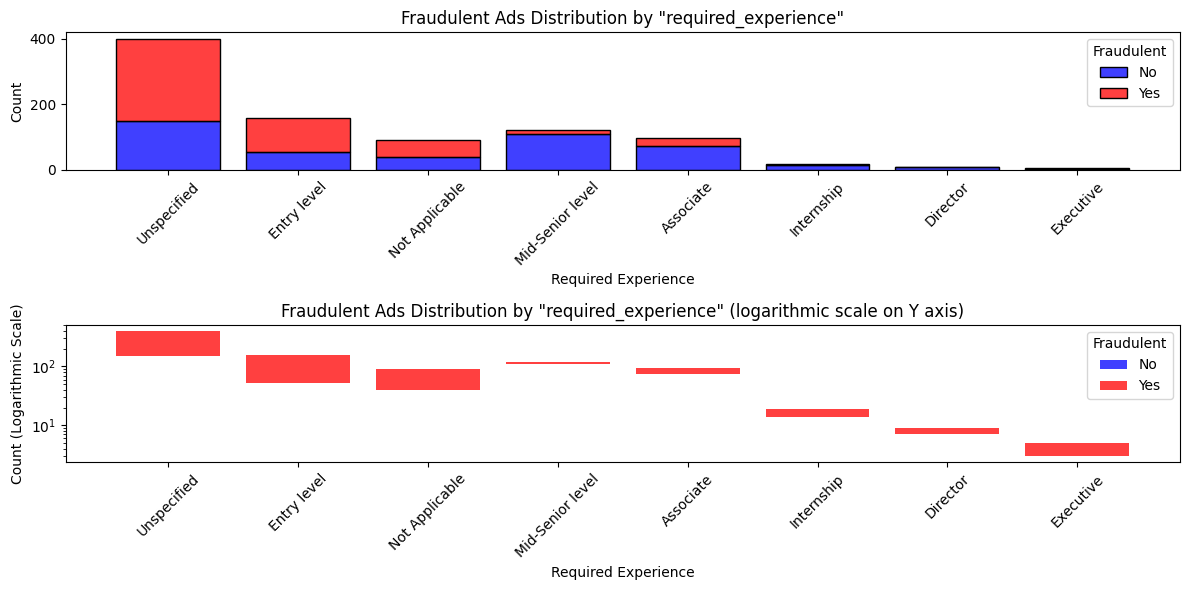

In [ ]:
#'required_experience' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='required_experience', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "required_experience"')
axes[0].set_xlabel('Required Experience')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='required_experience', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "required_experience" (logarithmic scale on Y axis)')
axes[1].set_xlabel('Required Experience')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'required_education' chart

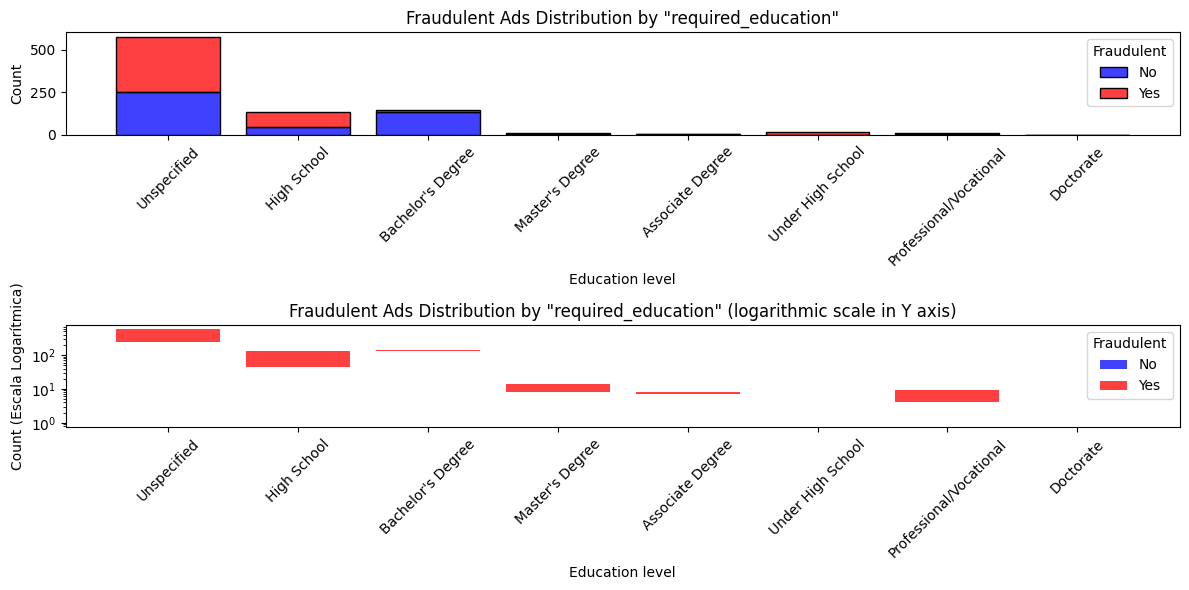

In [ ]:
#'required_education' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='required_education', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "required_education"')
axes[0].set_xlabel('Education level')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='required_education', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "required_education" (logarithmic scale in Y axis)')
axes[1].set_xlabel('Education level')
axes[1].set_ylabel('Count (Escala Logarítmica)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'industry' chart

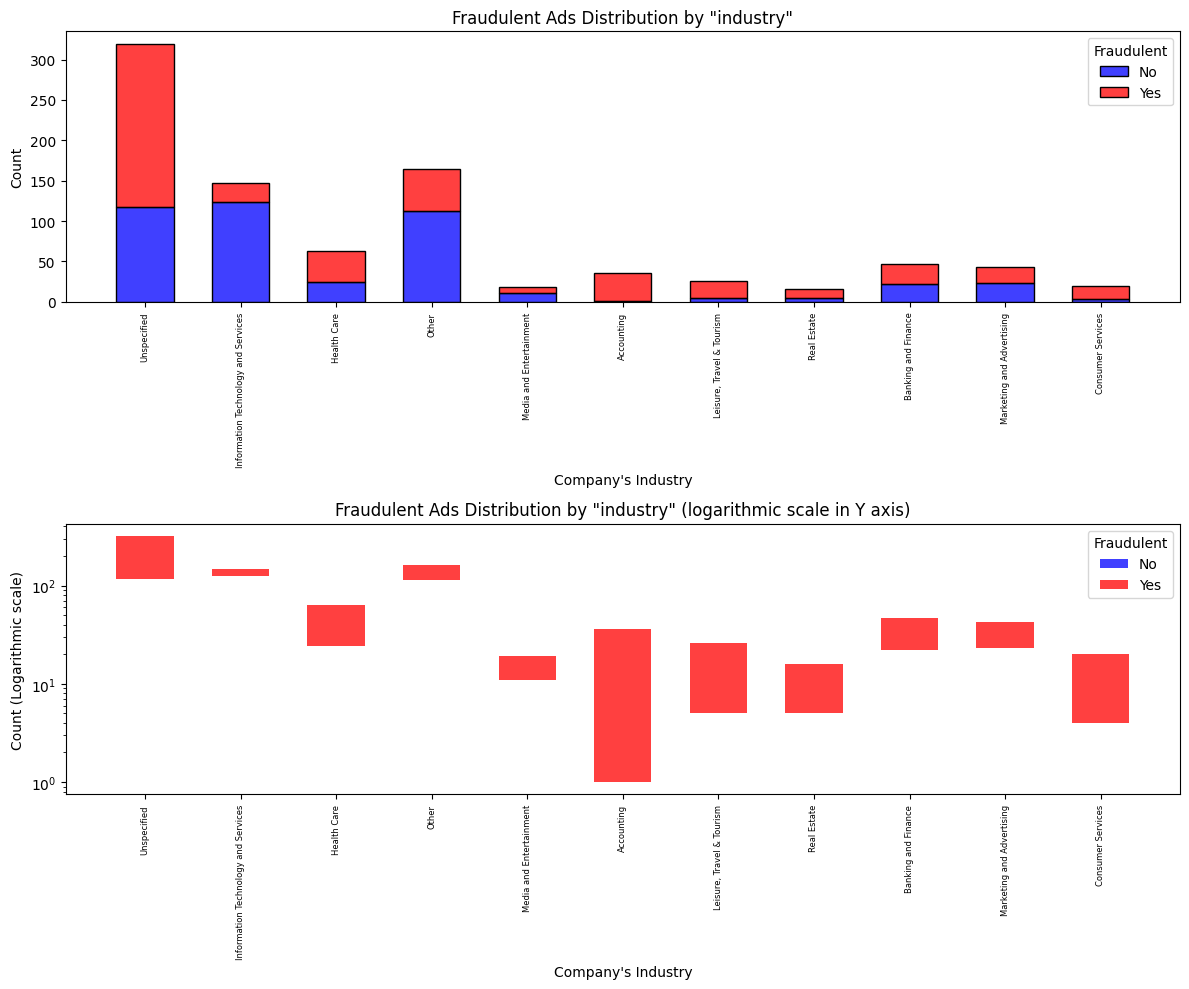

In [ ]:
#'industry' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='industry', hue='fraudulent', palette=colors, multiple="stack", shrink=0.6, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "industry"')
axes[0].set_xlabel("Company's Industry")
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=90, labelsize=6)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='industry', hue='fraudulent', palette=colors, multiple="stack", shrink=0.6, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "industry" (logarithmic scale in Y axis)')
axes[1].set_xlabel("Company's Industry")
axes[1].set_ylabel('Count (Logarithmic scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=90, labelsize=6)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'function' chart

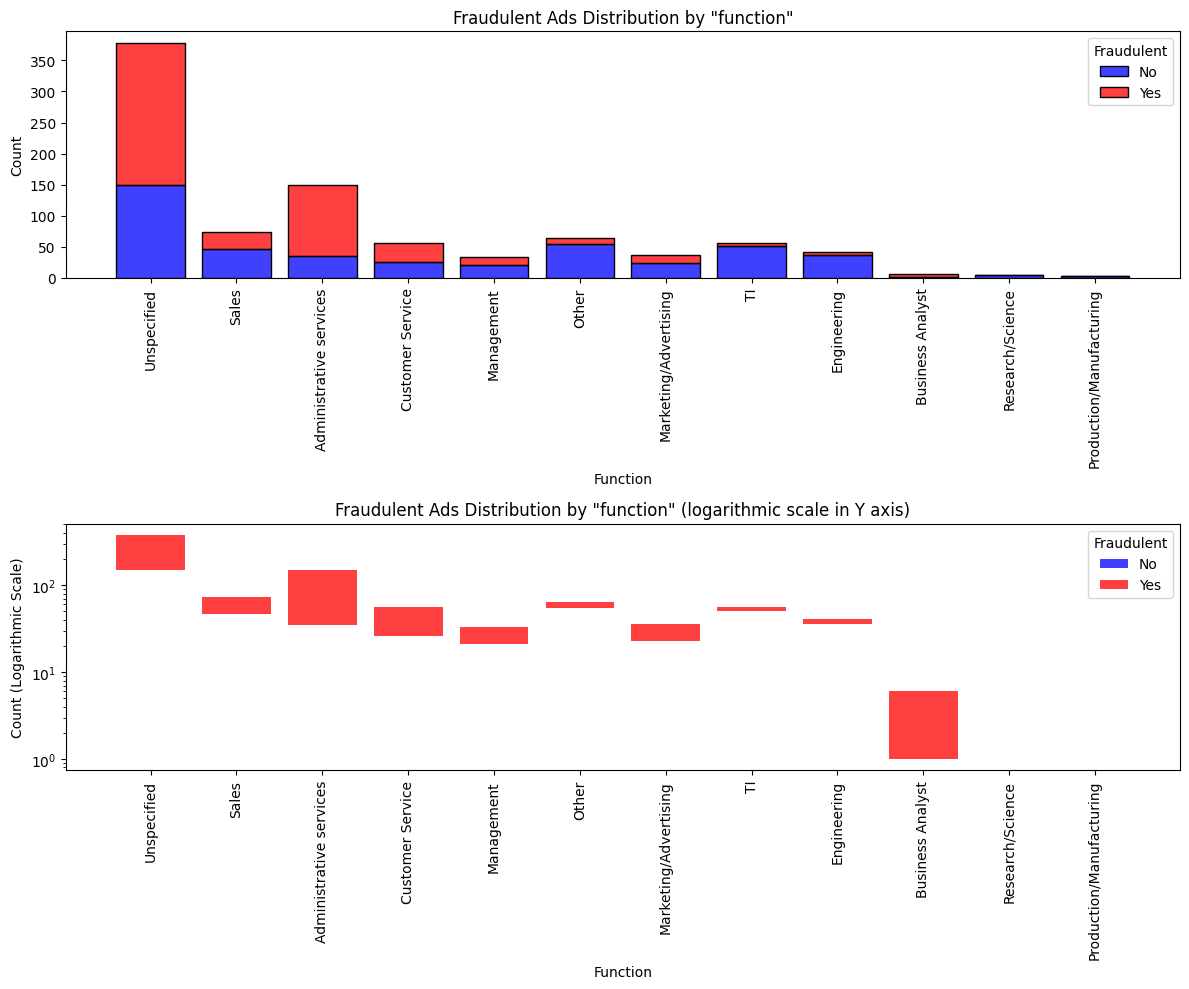

In [ ]:
#'function' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='function', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "function"')
axes[0].set_xlabel('Function')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=90)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='function', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "function" (logarithmic scale in Y axis)')
axes[1].set_xlabel('Function')
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=90)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'has_company_profile' chart

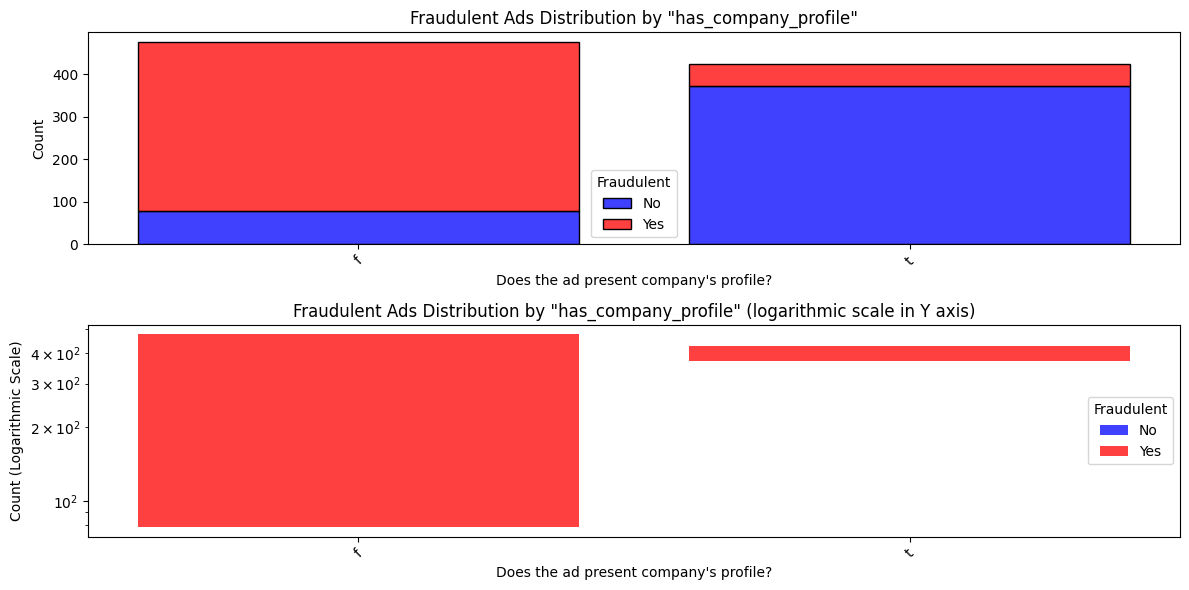

In [ ]:
#'has_company_profile' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_company_profile', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "has_company_profile"')
axes[0].set_xlabel("Does the ad present company's profile?")
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_company_profile', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "has_company_profile" (logarithmic scale in Y axis)')
axes[1].set_xlabel("Does the ad present company's profile?")
axes[1].set_ylabel('Count (Logarithmic Scale)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'has_description' chart

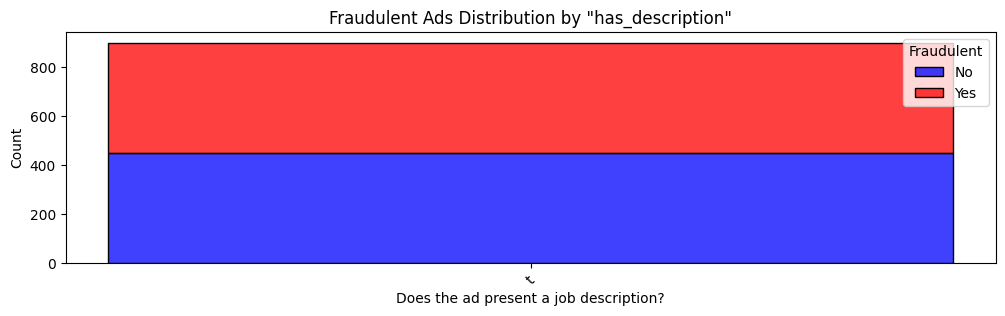

In [ ]:
#'has_description' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a bar chart
plt.figure(figsize=(12, 3))
sns.histplot(data=df_scam, x='has_description', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8)
plt.title('Fraudulent Ads Distribution by "has_description"')
plt.xlabel('Does the ad present a job description?')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.tick_params(axis='x', rotation=45)
plt.show()



####'has_requirements' chart

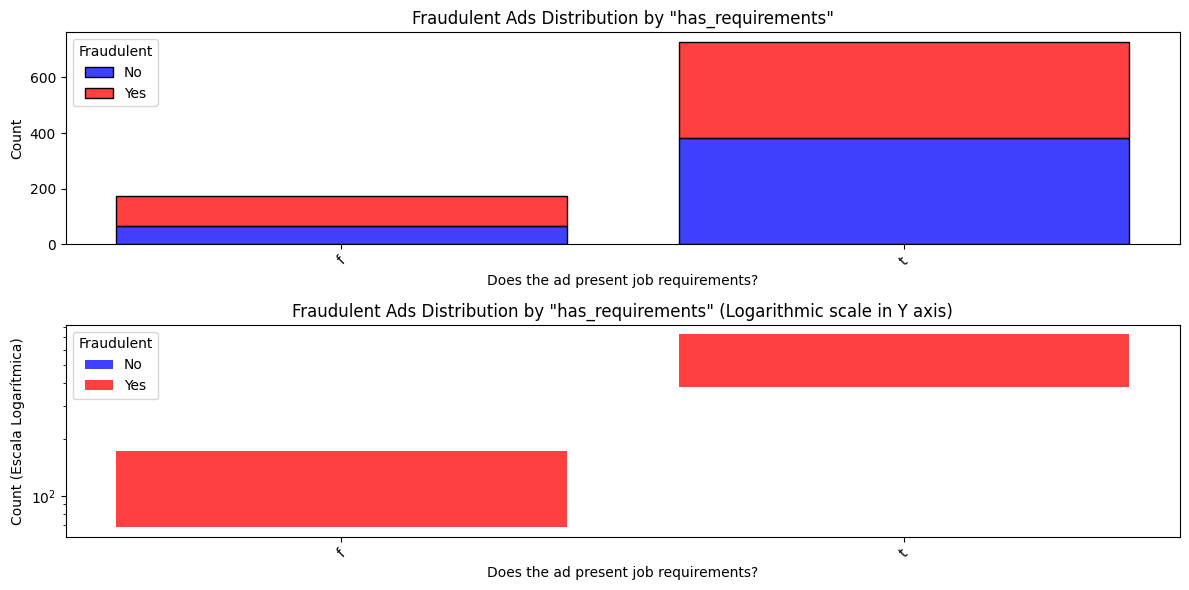

In [ ]:
#'has_requirements' chart
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_requirements', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "has_requirements"')
axes[0].set_xlabel('Does the ad present job requirements?')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_requirements', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "has_requirements" (Logarithmic scale in Y axis)')
axes[1].set_xlabel('Does the ad present job requirements?')
axes[1].set_ylabel('Count (Escala Logarítmica)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

####'has_benefits' charts

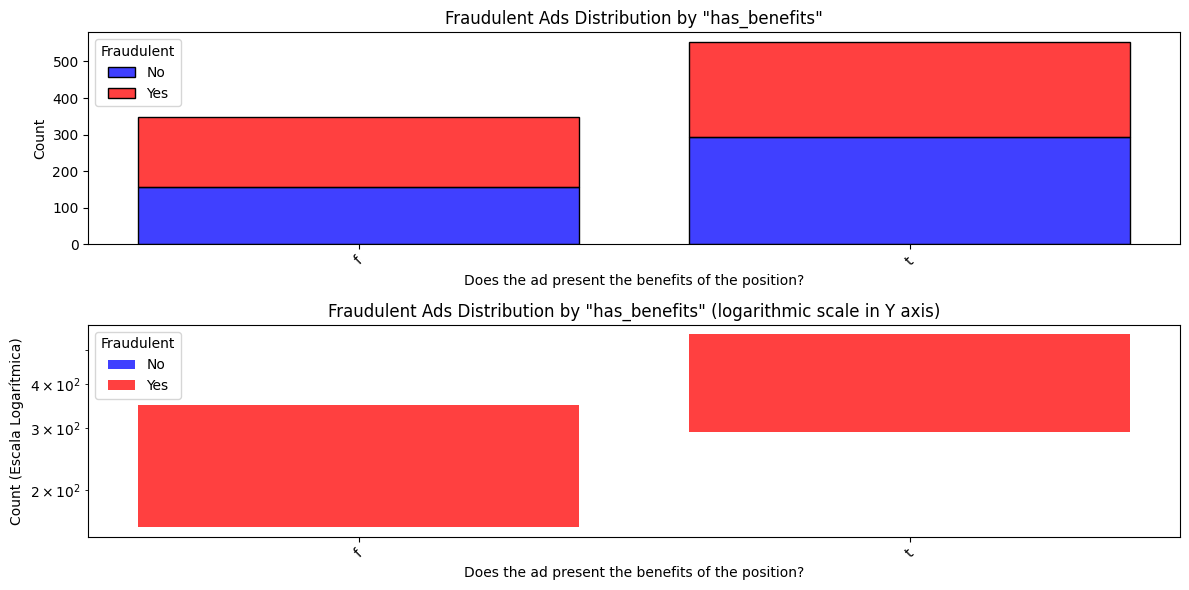

In [ ]:
#'has_benefits' charts
#Color palette
colors = {'f': 'blue', 't': 'red'}

#Creates a block with 2 charts vertically aligned (one on top of the other)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#First chart: without logarithmic scale in Y axis
sns.histplot(data=df_scam, x='has_benefits', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, ax=axes[0])
axes[0].set_title('Fraudulent Ads Distribution by "has_benefits"')
axes[0].set_xlabel('Does the ad present the benefits of the position?')
axes[0].set_ylabel('Count')
axes[0].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)

#Second chart: with logarithmic scale in Y axis

sns.histplot(data=df_scam, x='has_benefits', hue='fraudulent', palette=colors, multiple="stack", shrink=0.8, log_scale=(False, True), ax=axes[1])
axes[1].set_title('Fraudulent Ads Distribution by "has_benefits" (logarithmic scale in Y axis)')
axes[1].set_xlabel('Does the ad present the benefits of the position?')
axes[1].set_ylabel('Count (Escala Logarítmica)')
axes[1].legend(title='Fraudulent', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)

#Adjusts the grouped charts design
plt.tight_layout()

#Display the grouped charts
plt.show()

##Preliminary Insights

After the analyses, adjustments and simple visualizations were applied to the data, now we proceed to answer the initial questions:

**What are the most common departments for which job requirements are made?**

The high variability and high percentage of missing values in the 'department' field reduce the value of conclusions that can be drawn from its data. Therefore, conclusion will be taken similar fields that can serve as references, by that, we will use 'function' and 'industry' fields to conclude that the sector of Information Technology ('Information Technology and Services' and 'IT') is predominant.

**How are salary ranges distributed in job offers?**

The analysis of the 'salary_range' field is also unreliable because it has the highest level of missing values (~84%), making its analysis not representative of the data.

**What is the proportion of on-site versus online job offers?**

A large majority of the offers are on-site, representing 96% of the data.

**What percentage of ads include the company's logo?**

A large majority of the offers include the company's logo, representing 80% of the data.

**Are there notable patterns in the level of experience required by industry?**

Visualizations show that the highest volume of jobs is offered to professionals with higher education (4 to 6 years), such as Bachelor's and Engineering degrees, among others.

**What are the most frequent job functions in fraudulent or deceptive job offers?**

As expected, offers with the most missing data tend to be fraudulent. Here is a more detailed description for each graph:

*   For 'location': The US (United States) has the highest number of ads and also the highest number of fraudulent ads, to the point where the number of fraudulent ads exceeds non-fraudulent ones. It is important to note that after balancing the dataset, these effects are possible because about 17,000 records were discarded, which, following the data trend, were mostly from the US.
*   For 'telecommuting': The distribution shows no correlation with this variable since both on-site and remote jobs have a similar proportion of frauds.
*   For 'has_company_logo': There is a clear relationship between ads without a company logo and frauds, with about 80% of ads without a company logo being fraudulent.
*   For 'has_questions': Similar to the previous case, ads without screening questions are highly related to frauds, with about 2/3 of ads without a company logo being fraudulent.
*   'employment_type' is a multicategorical variable, and several points can be detailed: (1) The 'Unspecified' category has a high distribution rate of fraudulent ads having a big contribution in the field; (2) The 'Full-time' category has the highest number of fraudulent ads, but its rate of fraudulent ads is not higher than that of the 'Unspecified' category, and (3) The 'Part-time' category has the highest rate of fraudulent ads. These situations makes it hard to find a trend related to this variable.
*   'required_experience' is another multicategorical variable, where the 'Unspecified' category has a rate of over 50% fraudulent ads, while the 'Entry level' and 'Not Applicable' categories have a similar distribution but with fewer total ads.
*   'required_education' is also multicategorical. 'Unspecified' continues its trend with fraudulent ads; however, the distribution shows that the extremes of the range are quite susceptible to fraud, while 'Bachelor's Degree', 'Master's Degree', and 'Associate Degree' have a very low rate of fraudulent ads.
*   'industry' is another multicategorical variable from which it can be concluded that 'Unspecified' maintains its trend towards fraud, 'Information Technology and Services' (IT) contributes the most offers, and there are cases like 'Health Care', 'Accounting', 'Leisure, Travel and Tourism', and 'Customer Service' with very high rates of fraudulent ads.
*   'function' is another multicategorical variable. 'Unspecified' confirms its fraudulent tendency, as does 'Administrative services', which also confirms the analysis of the 'industry' distribution since this category includes services like 'Accounting'.
*   'has_company_profile' is a binary variable and repeats the behavior of 'has_company_logo' and 'has_questions', where the lack of information is related to fraudulent ads.
*   'has_requirements' and 'has_benefits' are binary variables that, like 'telecommuting', show no correlation with fraudulent ads.

#Feature Engineering

This dataset is strictly categorical, as the only variable with numerical intent (salary range) is an ordinal representation of salary levels and not continuous numerical values.

The following modifications to the dataset are proposed:

Therefore, the following modifications are proposed for the dataset:

1. Remove text-based variables: eliminate text-containing variables that won't be used in this analysis: "title", "company_profile", "description" "requirements", and "benefits".
2. Remove salary range: exclude the "salary_range" variable due to its low number of values, which limits its ability to provide meaningful insights.
3. Remove balanced dataset flag: The "in_balanced_dataset" variable is no longer useful since the dataset has already been balanced.
4. Remove department: The "department" variable poses a challenge due to its large number of categories. This makes it difficult to condense and analyze the data effectively.


In [ ]:
#Columns to delete
columns_to_delete = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'salary_range', 'in_balanced_dataset', 'department']

#Delete columns
df_scam_II=df_scam.drop(columns_to_delete, axis=1)

5. Apply label encoding to the variables 'location', 'industry', and 'function', as there is no order among the categories and their high quantity makes it computationally unfeasible to apply one-hot encoding.

In [ ]:
#Creates the label_encoder object
label_encoder = preprocessing.LabelEncoder()

#List of columns to encode
columns_to_encode = ['location', 'industry', 'function']

#Does the encoding
for column in columns_to_encode:
  df_scam_II[column]= label_encoder.fit_transform(df_scam_II[column])

6. Manual assignment of values for 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'has_company_profile', 'has_description', 'has_requirements', and 'has_benefits', which are binary value fields.
7. Manual assignment of binary values for 'employment_type', 'required_experience', and 'required_education'.

In [ ]:
#Binary columns
columns_to_encode=['telecommuting','has_company_logo','has_questions','fraudulent','has_company_profile','has_description','has_requirements','has_benefits']
for column in columns_to_encode:
    df_scam_II[column]=df_scam_II[column].replace({'t':1,'f':0})

#Ordinal categories columns
column='employment_type'
column_employment_type={
  'Unspecified':0,
  'Part-time':1,
  'Full-time':2,
  'Contract':3,
  'Temporary':4
}
df_scam_II[column]=df_scam_II[column].replace(column_employment_type)

column='required_experience'
column_required_experience={
  'Unspecified':0,
  'Not Applicable':1,
  'Internship':2,
  'Entry level':3,
  'Mid-Senior level':4,
  'Associate':5,
  'Director':6,
  'Executive':7
}
df_scam_II[column]=df_scam_II[column].replace(column_required_experience)

column='required_education'
column_required_education={
  'Unspecified':0,
  'Under High School':1,
  'High School':2,
  'Professional/Vocational':3,
  'Associate Degree':4,
  "Bachelor's Degree":5,
  "Master's Degree":6,
  'Doctorate':7
}
df_scam_II[column]=df_scam_II[column].replace(column_required_education)

#Display a sample of df_scam_II
df_scam_II.head()

,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,has_company_profile,has_description,has_requirements,has_benefits
144,6,0,0,0,0,0,0,10,11,1,0,1,0,0
180,4,0,0,0,0,0,0,10,9,1,0,1,1,1
493,5,0,0,0,2,3,2,4,0,1,0,1,1,0
1152,5,0,0,0,2,3,0,3,0,1,0,1,0,0
1297,5,0,0,0,2,1,0,8,2,0,0,1,1,0


Having all dataset with numeric values enables the possibility, to explore the correlation among the variables, executing a correlation heatmap.

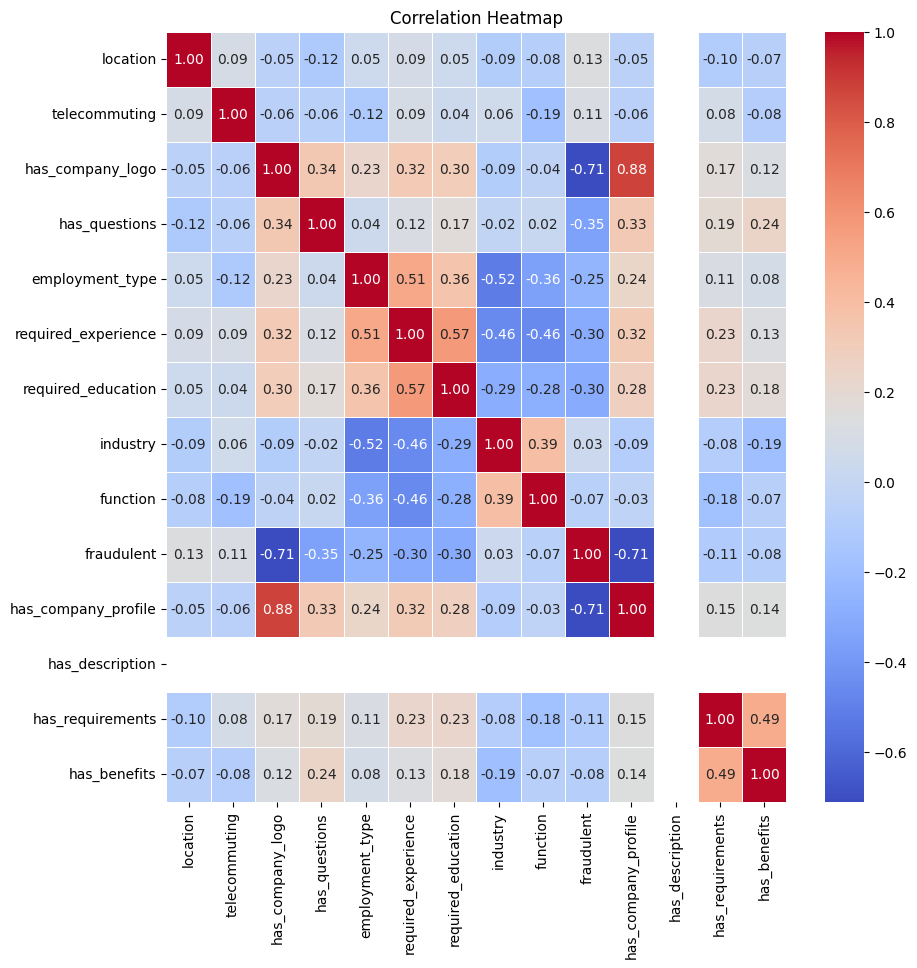

In [ ]:
#Shows the correlations among the current dataset variables
corr=df_scam_II.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

After inspecting the heatmap, the following insights can be obtained:
* The highest correlation in the graph associates the fields 'has_company_profile' and 'has_company_logo'.
* Other high-value correlations are observed among the variables 'industry', 'employment_type', 'required_experience', and 'required_education'.
* The variables that have the highest correlation with 'fraudulent' are 'has_company_profile' and 'has_company_logo'.



#Train and Test

##Model 1: Decision Tree

In [ ]:
#Splits the dataset
X=df_scam_II.drop('fraudulent',axis=1)
y=df_scam_II.fraudulent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [ ]:
#Trains the model
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
#Generates predictions
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
#Generates the accuracy probabilities of each prediction
clf_predict_proba = pd.DataFrame(clf.predict_proba(X_test), columns=['non_fraudulent','fraudulent'])
clf_predict_proba

,non_fraudulent,fraudulent
0,0.266667,0.733333
1,0.673913,0.326087
2,0.000000,1.000000
3,0.086331,0.913669
4,0.842105,0.157895
...,...,...
292,1.000000,0.000000
293,0.909091,0.090909
294,0.086331,0.913669
295,0.086331,0.913669


In [ ]:
#Averages the probability values for each label
clf_predict_proba.describe().loc['mean',:].to_frame()

,mean
non_fraudulent,0.521598
fraudulent,0.478402


In [ ]:
print('Modelo score: {:.4f}'.format(clf.score(X_test, y_test)))

Modelo score: 0.9057


In [ ]:
print('The Classification Report')
print(classification_report(y_test,y_pred))

The Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       156
           1       0.90      0.90      0.90       141

    accuracy                           0.91       297
   macro avg       0.91      0.91      0.91       297
weighted avg       0.91      0.91      0.91       297



From the classification report we can say:

* Regarding **precision**, of all the records that the model predicted to be fraudulent, 83% were correct; for the non-fraudulent records, 96% of the predicted results were correct.

* Regarding **recall**, of all the records that turned out to be fraudulent, the model correctly predicted 96%; for the non-fraudulent records, the model correctly predicted 83%.

* Regarding **f1-score**, as the harmonic balance of precision and reacall, considering its strong approach to 1, we can say that this model performs very well.

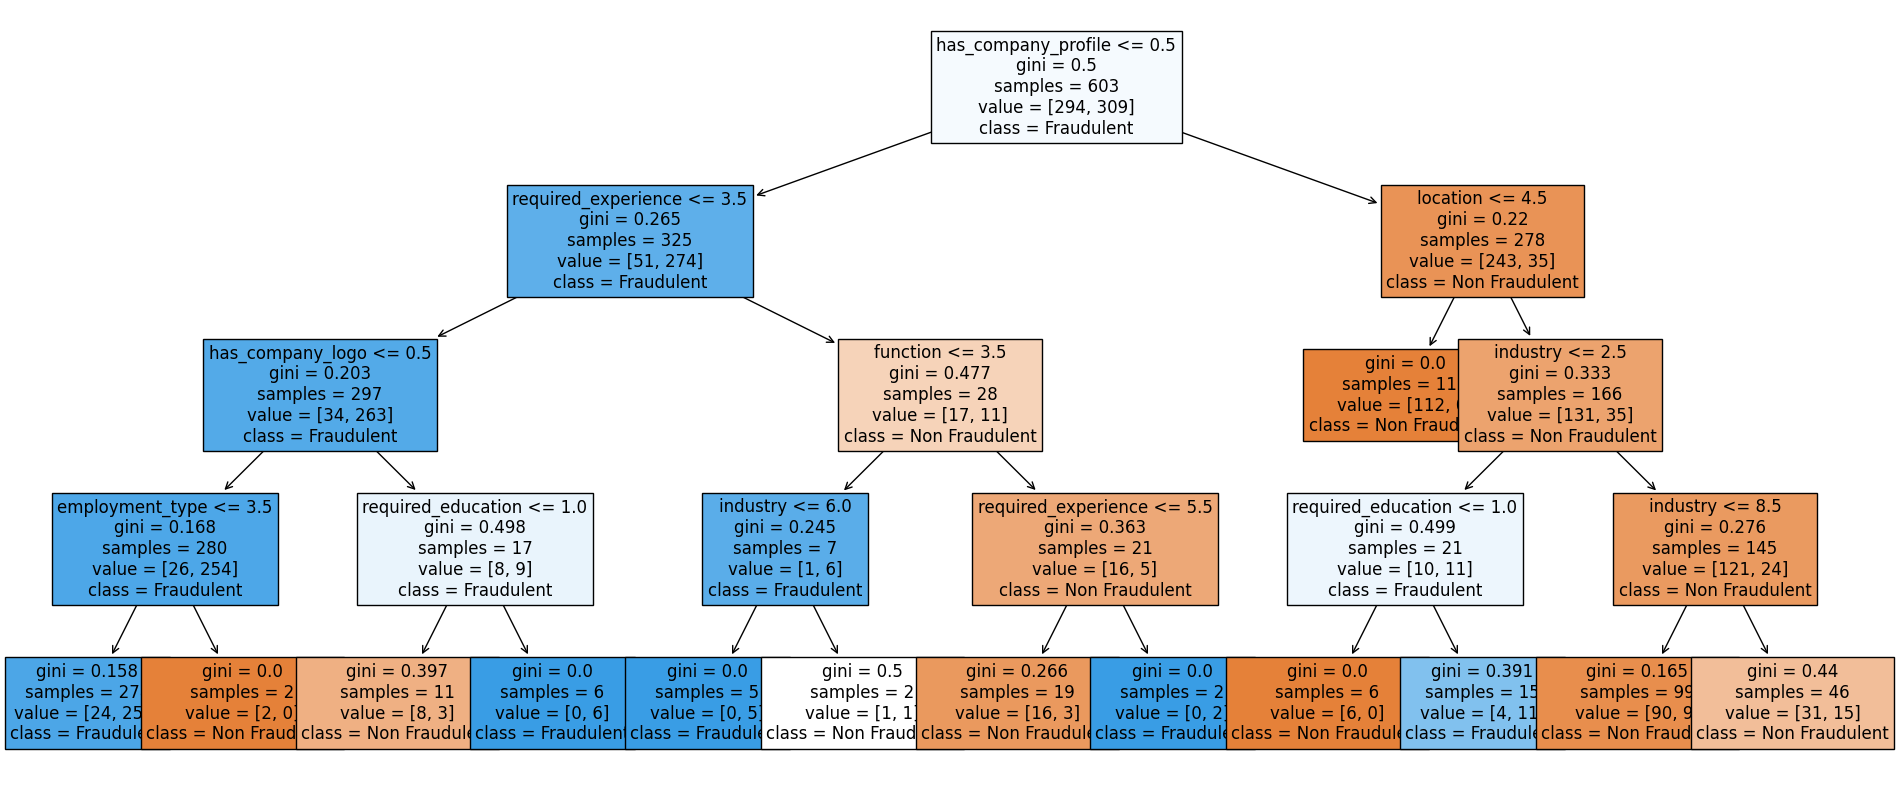

In [ ]:
#Plots the tree
fig = plt.figure(figsize=(24,10))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names={0:'Non Fraudulent', 1:'Fraudulent'},
                   filled=True,
                  fontsize=12)

##Model 2: Logistic Regresion

In [ ]:
#Loads logistic regression object
#The number of iterations (max_iter) was set to 1000 because it did not converge using the default iteration value (100)
log_reg=LogisticRegression(max_iter=1000)

In [ ]:
#Trains the model
#The same training and test values calculated for the previous model are used
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Generates model predictions
y_pred=log_reg.predict(X_test)

In [ ]:
#Generates the accuracy probabilities for the predictions
log_reg_predict_proba = pd.DataFrame(log_reg.predict_proba(X_test), columns=['non_fraudulent','fraudulent'])

In [ ]:
#Averages the probability values for each label
log_reg_predict_proba.describe().loc['mean',:].to_frame()

,mean
non_fraudulent,0.515998
fraudulent,0.484002


In [ ]:
print('Score del modelo: {:.4f}'.format(log_reg.score(X_test, y_test)))

Score del modelo: 0.8721


In [ ]:
print('The Classification Report')
print(classification_report(y_test,y_pred))

The Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       156
           1       0.86      0.88      0.87       141

    accuracy                           0.87       297
   macro avg       0.87      0.87      0.87       297
weighted avg       0.87      0.87      0.87       297



By obtaining the classification report and comparing its values for both models, we observe that those of model 1 are almost entirely superior to those of model 2, so we can conclude that model 1 (decision tree) has the best performance.

#Optimization

##Model 1 optimization (RandomizedSearchCV)


In [ ]:
#Sets parameters for optimization
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10],
}

#Runs optimization
rs=RandomizedSearchCV(DecisionTreeClassifier(),params,cv=5,return_train_score=False,n_iter=2)
rs.fit(X_test, y_test)

#Shows desired values
pd.DataFrame(rs.cv_results_)[['param_criterion','param_splitter','param_max_depth','mean_test_score']]

,param_criterion,param_splitter,param_max_depth,mean_test_score
0,log_loss,best,2,0.875311
1,entropy,random,4,0.861525


In [ ]:
#Runs again the optimization using optimized parameters
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
clf = clf.fit(X_test, y_test)
print('Model\'s score with optimized parameters ',clf.score(X_test, y_test))

Model's score with optimized parameters  0.9393939393939394


##Model 2 optimization (GridSearchCV)

In [ ]:
#Sets optimization parameters
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2'],
    'solver':['lbfgs', 'liblinear', 'newton-cg'],
    'max_iter':[200, 400, 600, 800, 1000]
}

#Runs optimization
lr_optimizada = GridSearchCV(LogisticRegression(), params, cv=5, return_train_score=False)
lr_optimizada.fit(df_scam_II, df_scam_II.fraudulent)

#Shows desired values
pd.DataFrame(lr_optimizada.cv_results_)[['param_C','param_penalty','param_solver', 'param_max_iter','mean_test_score']]

,param_C,param_penalty,param_solver,param_max_iter,mean_test_score
0,0.001,l1,lbfgs,200,NaN
1,0.001,l1,liblinear,200,0.500000
2,0.001,l1,newton-cg,200,NaN
3,0.001,l2,lbfgs,200,0.816667
4,0.001,l2,liblinear,200,0.798889
...,...,...,...,...,...
175,100,l1,liblinear,1000,1.000000
176,100,l1,newton-cg,1000,NaN
177,100,l2,lbfgs,1000,1.000000
178,100,l2,liblinear,1000,1.000000


In [ ]:
#Runs again the optimization using optimized parameters
log_reg=LogisticRegression(C=100,penalty='l2',solver='lbfgs',max_iter=1000)
log_reg.fit(X_train,y_train)
print("Model's score with optimized parameters ",log_reg.score(X_test, y_test))

Model's score with optimized parameters  0.8686868686868687


# Conclusions

*   Variables with a high number of categories like 'department' require a more rigorous analysis to reduce their category count in order to extract added value from their elements.
*   The variable 'salary_range', the only one with numerical intention, did not provide practical value to the study due to its high volume of missing records (~84%).
*   The majority of job opportunities are offered to professionals with higher education of long-term careers (4 to 6 years), such as graduates and engineers, among others.
*   The variables that exhibit the highest correlation with 'fraudulent' are 'has_company_profile' and 'has_company_logo'.
*   Regarding the implemented algorithms, the decision tree performed the best, with an initial score of ~0.89 which improved to ~0.95 after optimization.

# Recomendations

* Implement a wider range of classification algorithms to have a battery from which to choose the best one.
* Implement cross-validation algorithms (k-fold).
* Implement natural language processing algorithms to process the fields 'title', 'company_profile', 'description', 'requirements', and 'benefits' to detect patterns that could assist in identifying fraudulent job postings based on the text of the announcement.
* Generate an executive document that provides a summary of this exercise.



# Acknowledgements

* To my classmates
* To the team of professors, who demonstrated a very high level, with special mention to Professor Walter Bernal and my Tutor María Soledad Gutiérrez.
* To my dear family, who endured my rush and my absences.

